### Questão 2
Considere o problema do GPS. Um ponto $P$ emissor de sinal sobre a superfície da Terra terá seu vetor posição ($\mathbf{r}^t = [X, Y, Z]$) calculado a partir das leituras de distâncias de $P$ a 3 satélites geo-estacionários que melhor captaram o sinal de $P$. Estas três distâncias são $R_1, R_2, R_3$. As posições dos três satélites em questão são dadas pelos vetores $\mathbf{r}_1, \mathbf{r}_2, \mathbf{r}_3$. Em um dado problema conhecem-se os valores de $\mathbf{r}_1, \mathbf{r}_2, \mathbf{r}_3$ e de $R_1, R_2, R_3$. O objetivo é determinar $\mathbf{r}$. O problema pode ser entendido como buscar a interseção de três esferas de raios $R_1, R_2, R_3$ centradas, respectivamente, em $\mathbf{r}_1, \mathbf{r}_2, \mathbf{r}_3$.

(i) Apresente a formulação matemática do problema descrevendo as variáveis e equações disponíveis na forma $F(\mathbf{r}) = 0$

Resposta:

Vamos definir as variáveis:

- $\mathbf{r} = [X \ Y \ Z]^T$ é o vetor posição do ponto $P$.
- $\mathbf{r}_1 = [X_1 \ Y_1 \ Z_1]^T$, $\mathbf{r}_2 = [X_2 \ Y_2 \ Z_2]^T$, $\mathbf{r}_3 = [X_3 \ Y_3 \ Z_3]^T$ são os vetores posição dos satélites 1, 2 e 3, respectivamente.
- $R_1$, $R_2$, $R_3$ são as distâncias de $P$ aos satélites 1, 2 e 3, respectivamente.

As equações das esferas são dadas por:

1. $(X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 = R_1^2$
2. $(X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 = R_2^2$
3. $(X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 = R_3^2$

Estas são as três equações que descrevem as esferas centradas nos satélites com os respectivos raios.

Formulação matemática:

$
F(\mathbf{r}) = 
\begin{cases}
(X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 - R_1^2 = 0 \\
(X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 - R_2^2 = 0 \\
(X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 - R_3^2 = 0
\end{cases}
$

Nosso objetivo é encontrar o vetor posição $\mathbf{r} = [X \ Y \ Z]^T$ que satisfaça essas três equações simultaneamente.


(ii) Apresente a expressão da matriz jacobiana das Eqs. (1), isto é:

Resposta:

A matriz jacobiana $J$ é dada por:

$
J = \left[ \nabla_\mathbf{r} F \right]^T
$

onde $\nabla_\mathbf{r} F$ é o gradiente de $F$ com respeito a $\mathbf{r}$.

Vamos calcular as derivadas parciais das equações das esferas em relação a $X$, $Y$ e $Z$.

Para a primeira equação:

$
(X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 = R_1^2
$

As derivadas parciais são:

$
\frac{\partial F_1}{\partial X} = 2(X - X_1), \quad \frac{\partial F_1}{\partial Y} = 2(Y - Y_1), \quad \frac{\partial F_1}{\partial Z} = 2(Z - Z_1)
$

De maneira similar, para as outras duas equações:

$
\frac{\partial F_2}{\partial X} = 2(X - X_2), \quad \frac{\partial F_2}{\partial Y} = 2(Y - Y_2), \quad \frac{\partial F_2}{\partial Z} = 2(Z - Z_2)
$

$
\frac{\partial F_3}{\partial X} = 2(X - X_3), \quad \frac{\partial F_3}{\partial Y} = 2(Y - Y_3), \quad \frac{\partial F_3}{\partial Z} = 2(Z - Z_3)
$

Portanto, a matriz jacobiana $J$ é:

$
J = \begin{bmatrix}
2(X - X_1) & 2(Y - Y_1) & 2(Z - Z_1) \\
2(X - X_2) & 2(Y - Y_2) & 2(Z - Z_2) \\
2(X - X_3) & 2(Y - Y_3) & 2(Z - Z_3)
\end{bmatrix}
$

Considerando os dados (em $10^3$ km):

$
\mathbf{r}_1 = \begin{bmatrix} 8 \\ 2 \\ 8 \end{bmatrix}, 
\quad \mathbf{r}_2 = \begin{bmatrix} 2 \\ 9 \\ 9 \end{bmatrix}, 
\quad \mathbf{r}_3 = \begin{bmatrix} 8 \\ 8 \\ 8 \end{bmatrix}
$

e para as distâncias do objeto aos satélites:

$
R_1 = 5, \quad R_2 = 5, \quad R_3 = 4
$

Substituindo os valores dos vetores posição dos satélites e das distâncias na matriz jacobiana.

$
J = \begin{bmatrix}
2(X - 8) & 2(Y - 2) & 2(Z - 8) \\
2(X - 2) & 2(Y - 9) & 2(Z - 9) \\
2(X - 8) & 2(Y - 8) & 2(Z - 8)
\end{bmatrix}
$

Com o MATLAB plote os centros dos 3 satélites em 3D (PLOT3) e em seguida desenhe com SURF as 3 esferas centradas em cada um (use uma palete clara e "cheguei" como COOL). Com ROTATE3D pesquise ao redor da imagem por pontos candidatos a serem solução do problema. Salve estas imagens no documento de resolução indicando com "flechinhas" as possíveis soluções.

Resposta:

In [1]:
# Importing the necessary libraries
import scipy
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter, MultipleLocator

In [2]:
# Function to plot satellites and spheres
def plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=40):

    # Plot grid
    phi, theta = np.mgrid[0.0:2.0 * np.pi:100j, 0.0:np.pi:50j]

    # Function to plot sphere
    def plot_sphere(center, radius, color):
        x = center[0] + radius * np.sin(theta) * np.cos(phi)
        y = center[1] + radius * np.sin(theta) * np.sin(phi)
        z = center[2] + radius * np.cos(theta)
        ax.plot_surface(x, y, z, color=color, alpha=0.2)

    # Plot satellites centers
    ax.scatter(r1[0], r1[1], r1[2], color='r', s=10, label='Satellite 1')
    ax.scatter(r2[0], r2[1], r2[2], color='g', s=10, label='Satellite 2')
    ax.scatter(r3[0], r3[1], r3[2], color='b', s=10, label='Satellite 3')

    # Plot spheres
    plot_sphere(r1, R1, 'r')
    plot_sphere(r2, R2, 'g')
    plot_sphere(r3, R3, 'b')

    # Format function for ticks
    format_func = lambda x, pos: f"{x:.0f}"
    formatter = FuncFormatter(format_func)

    # Set tick formatter and locator
    TICK_INTERVAL = 3
    locator = MultipleLocator(TICK_INTERVAL)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_major_locator(locator)
    ax.yaxis.set_major_formatter(formatter)
    ax.yaxis.set_major_locator(locator)
    ax.zaxis.set_major_formatter(formatter)
    ax.zaxis.set_major_locator(locator)

    # Plot configuration
    ax.set_xlabel('X (1000km)')
    ax.set_ylabel('Y (1000km)')
    ax.set_zlabel('Z (1000km)')
    ax.set_title('Satellite Spheres')
    ax.legend()

    # Scale adjust
    ax.set_box_aspect([1, 1, 1])  # equalizing axis scales
    ax.set_xlim([-5, 15])
    ax.set_ylim([-5, 15])
    ax.set_zlim([-5, 15])
    ax.view_init(elev=elev,
                 azim=azim)  # Adjust azimuth to move plot left/right


Ajustando as variáveis para os valores mencionados:

In [3]:
# Satellites centers
X1, Y1, Z1 = 8, 2, 8
X2, Y2, Z2 = 2, 9, 9
X3, Y3, Z3 = 8, 8, 8

r1 = [X1, Y1, Z1]
r2 = [X2, Y2, Z2]
r3 = [X3, Y3, Z3]

# Spheres radius
R1, R2, R3 = 5, 5, 4

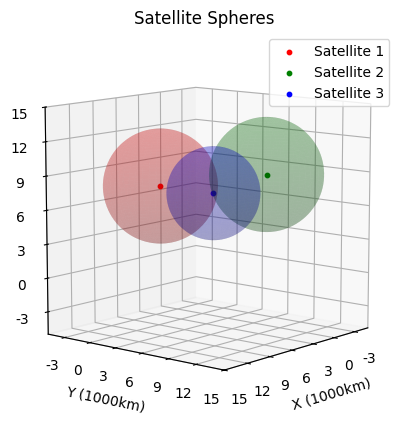

In [4]:
# Figure creation
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=40)

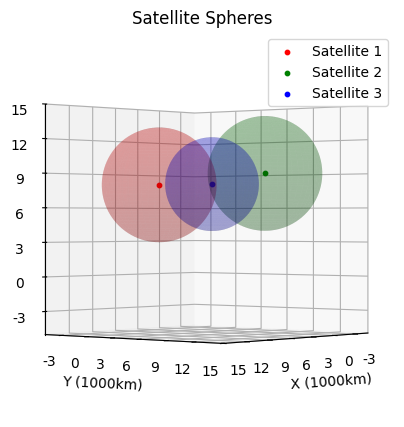

In [5]:
# Figure creation
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=0, azim=40)

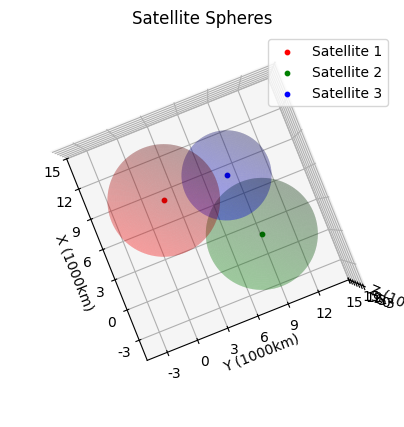

In [6]:
# Figure creation
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=-90, azim=20)

(iv) A partir de um chute inicial razoável, determine r com o Método Newton-Raphson executado em MATLAB, e plotando em 3D sobre a figura anterior os pontos da marcha Newton-Raphson em busca da solução (ou das soluções). Para isto use HOLD ON e PLOT3 com "bolinhas" bem "grossinhas" em preto para cada ponto da marcha NR.

Resposta:

In [7]:
# Sphere functions
def sphere_functions(r, r1, r2, r3, R1, R2, R3):
    return np.array([
        (r[0] - r1[0])**2 + (r[1] - r1[1])**2 + (r[2] - r1[2])**2 - R1**2,
        (r[0] - r2[0])**2 + (r[1] - r2[1])**2 + (r[2] - r2[2])**2 - R2**2,
        (r[0] - r3[0])**2 + (r[1] - r3[1])**2 + (r[2] - r3[2])**2 - R3**2
    ])

# Gradients (Jacobian)
def jacobian(r, r1, r2, r3):
    return np.array([
        [2*(r[0] - r1[0]), 2*(r[1] - r1[1]), 2*(r[2]-r1[2])],
        [2*(r[0] - r2[0]), 2*(r[1] - r2[1]), 2*(r[2]-r2[2])],
        [2*(r[0] - r3[0]), 2*(r[1] - r3[1]), 2*(r[2]-r3[2])]
    ])

# Newton-Raphson method
def newton_raphson(r_init, r1, r2, r3, R1, R2, R3, ax, tol=1e-10, max_iter=100):
    r = np.array(r_init, dtype=float)
    points = [r.copy()]
    for i in range(max_iter):
        F = sphere_functions(r, r1, r2, r3, R1, R2, R3)
        J = jacobian(r, r1, r2, r3)
        delta_r = -np.linalg.inv(J) @ F
        r += delta_r
        print(r)
        points.append(r.copy())
        
        # Plot iteration point
        ax.scatter(r[0], r[1], r[2], color='k', s=20, marker='o')
        if np.linalg.norm(delta_r) < tol:
            break
    
    # Plot lines connecting iteration points
    points = np.array(points)
    ax.plot(points[:, 0], points[:, 1], points[:, 2], color='k', linestyle='-', linewidth=2)
    
    return r, i


initial r: [0, 0, 0]
[4.07142857 5.75       1.17857143]
[4.64021269 5.75       4.59127616]
[4.89155663 5.75       6.09933975]
[4.97208875 5.75       6.5825325 ]
[4.98249223 5.75       6.64495335]
[4.98267184 5.75       6.64603103]
[4.98267189 5.75       6.64603135]
[4.98267189 5.75       6.64603135]
r =  [4.98267189 5.75       6.64603135]
num of iterations =  7


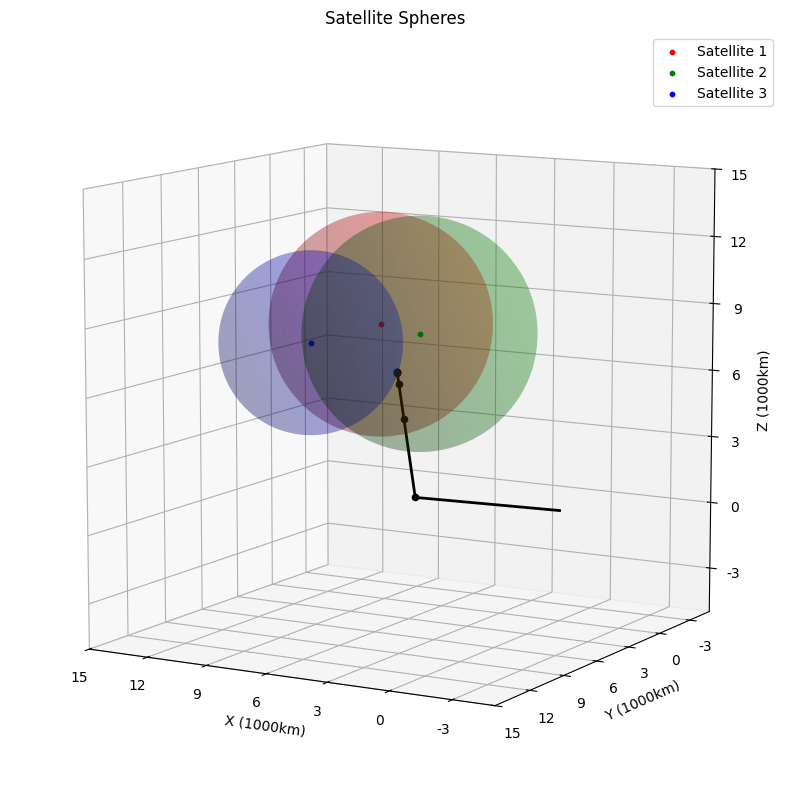

In [8]:
# Figure creation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot satellites and spheres
plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=120)

# Newton-Raphson Call
r_init = [0, 0, 0]
print('initial r:', r_init)

sol, iterations = newton_raphson(r_init, r1, r2, r3, R1, R2, R3, ax)
print('r = ', sol)
print('num of iterations = ', iterations)

initial r: [0, 0, 10]
[13.625  5.75  58.5  ]
[ 9.45982685  5.75       33.50896112]
[ 7.38266109  5.75       21.04596656]
[ 6.35482169  5.75       14.87893016]
[ 5.86163008  5.75       11.91978047]
[ 5.65116064  5.75       10.65696385]
[ 5.59087189  5.75       10.29523134]
[ 5.58495383  5.75       10.25972296]
[ 5.58489568  5.75       10.25937408]
[ 5.58489568  5.75       10.25937405]
[ 5.58489568  5.75       10.25937405]
r =  [ 5.58489568  5.75       10.25937405]
num of iterations =  10


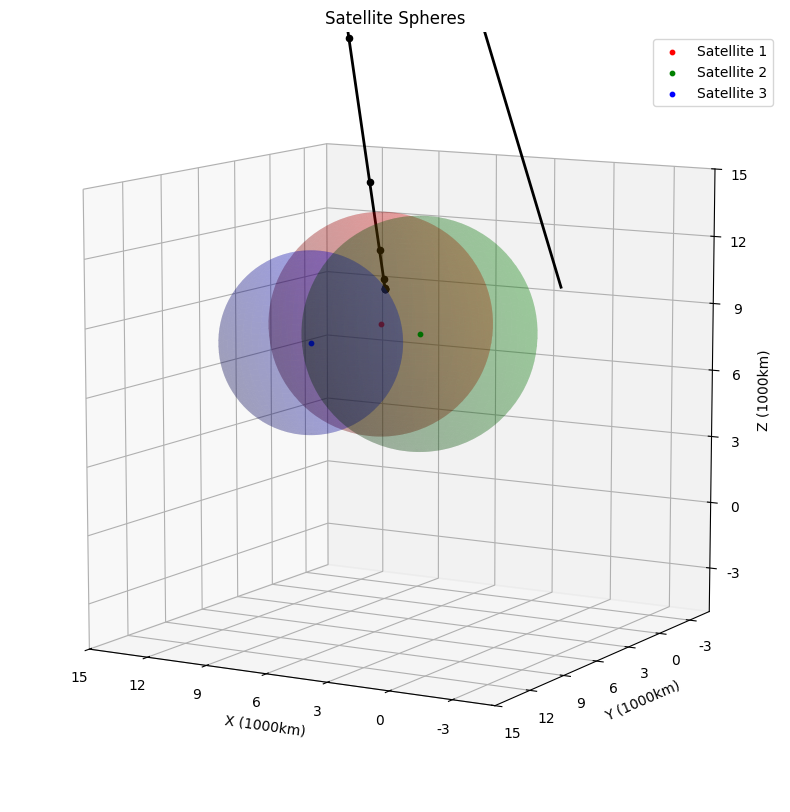

In [9]:
# Figure creation
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot satellites and spheres
plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=120)

# Newton-Raphson Call
r_init = [0, 0, 10]
print('initial r:', r_init)

sol, iterations = newton_raphson(r_init, r1, r2, r3, R1, R2, R3, ax)
print('r = ', sol)
print('num of iterations = ', iterations)

(v) Coloque o problema como um Problema de Otimização Irrestrita tendo a forma da Eq. (3). Obtenha a Função Objetivo $G(r)$. 

Resposta:

Cada equação das esferas representa a condição de que a distância do ponto $ \mathbf{r} $ ao centro do satélite deve ser igual à distância medida $ R_i $. Ou seja, quando $ F_i(\mathbf{r}) = 0 $:

$$
F_i(\mathbf{r}) = (X - X_i)^2 + (Y - Y_i)^2 + (Z - Z_i)^2 - R_i^2 = 0
$$

Assim:

$$
F_1(\mathbf{r}) = (X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 - R_1^2 = 0
$$
$$
F_2(\mathbf{r}) = (X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 - R_2^2 = 0
$$
$$
F_3(\mathbf{r}) = (X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 - R_3^2 = 0
$$

A função objetivo será definida como a soma dos quadrados das funções $ F_i(\mathbf{r}) $:

$$
G(\mathbf{r}) = F_1(\mathbf{r})^2 + F_2(\mathbf{r})^2 + F_3(\mathbf{r})^2
$$

Quando $ G(\mathbf{r}) $ é minimizado (ou seja, quando $ G(\mathbf{r}) = 0 $), isso implica que todas as três equações $ F_i(\mathbf{r}) $ são satisfeitas simultaneamente:

$$
F_1(\mathbf{r}) = 0, \quad F_2(\mathbf{r}) = 0, \quad F_3(\mathbf{r}) = 0
$$

Assim, a função objetivo resulta em:

$$
G(\mathbf{r}) = \left( (X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 - R_1^2 \right)^2 \\
+ \left( (X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 - R_2^2 \right)^2 \\
+ \left( (X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 - R_3^2 \right)^2
$$

Minimizar $ G(\mathbf{r}) $ encontra o ponto $ \mathbf{r} $ que está na interseção das três esferas definidas pelas distâncias $ R_1, R_2, R_3 $ a partir dos satélites. Este ponto $ \mathbf{r} $ é a posição correta do ponto $ P $ no espaço.

Desta forma, a função objetivo $ G(\mathbf{r}) $ se torna essencialmente uma medida de erro. Minimizar esta medida de erro (ao torná-la zero) garante que encontramos a posição $ \mathbf{r} $ que satisfaz as condições geométricas impostas pelas distâncias aos satélites.

Assim, o problema de otimização irrestrita pode ser formulado como:

$$
\min G(\mathbf{r}) = \left( (X - X_1)^2 + (Y - Y_1)^2 + (Z - Z_1)^2 - R_1^2 \right)^2 \\
+ \left( (X - X_2)^2 + (Y - Y_2)^2 + (Z - Z_2)^2 - R_2^2 \right)^2 \\
+ \left( (X - X_3)^2 + (Y - Y_3)^2 + (Z - Z_3)^2 - R_3^2 \right)^2
$$

$$
\mathbf{r} = (X, Y, Z) \in \mathbb{R}^3
$$

(vi) Obter o Gradiente ( $g = \nabla_r G$ ) e a Matriz Hessiana ( $H = \nabla_r \nabla_r^T G$ ) da Função Objetivo acima

Resposta:

In [10]:
# Defining the variables
X, Y, Z = sp.symbols('X Y Z')

# Defining the functions F_i(r)
F1 = (X - X1)**2 + (Y - Y1)**2 + (Z - Z1)**2 - R1**2
F2 = (X - X2)**2 + (Y - Y2)**2 + (Z - Z2)**2 - R2**2
F3 = (X - X3)**2 + (Y - Y3)**2 + (Z - Z3)**2 - R3**2

# Defining the function G(r)
G = F1**2 + F2**2 + F3**2

# Calculating the gradient of G
grad_G_X = sp.diff(G, X)
grad_G_Y = sp.diff(G, Y)
grad_G_Z = sp.diff(G, Z)
grad_G = sp.Matrix([grad_G_X, grad_G_Y, grad_G_Z])
grad_G.simplify()
print('Gradient Shape: ', grad_G.shape)

# Calculating the Hessian matrix of G
hessian_G = sp.hessian(G, (X, Y, Z))
hessian_G.simplify()
print('Hessian Shape: ', hessian_G.shape)

Gradient Shape:  (3, 1)
Hessian Shape:  (3, 3)


In [11]:
print('G gradient: ')
grad_G

G gradient: 


Matrix([
[   12*X**3 - 216*X**2 + 12*X*Y**2 - 152*X*Y + 12*X*Z**2 - 200*X*Z + 2752*X - 72*Y**2 + 784*Y - 72*Z**2 + 1168*Z - 10184],
[   12*X**2*Y - 76*X**2 - 144*X*Y + 784*X + 12*Y**3 - 228*Y**2 + 12*Y*Z**2 - 200*Y*Z + 2888*Y - 76*Z**2 + 1288*Z - 11564],
[12*X**2*Z - 100*X**2 - 144*X*Z + 1168*X + 12*Y**2*Z - 100*Y**2 - 152*Y*Z + 1288*Y + 12*Z**3 - 300*Z**2 + 3368*Z - 14132]])

In [12]:
print('G Hessian 1st column = ')
hessian_G[:,0]

G Hessian 1st column = 


Matrix([
[36*X**2 - 432*X + 12*Y**2 - 152*Y + 12*Z**2 - 200*Z + 2752],
[                              24*X*Y - 152*X - 144*Y + 784],
[                             24*X*Z - 200*X - 144*Z + 1168]])

In [13]:
print('G Hessian 2nd column = ')
hessian_G[:,1]

G Hessian 2nd column = 


Matrix([
[                              24*X*Y - 152*X - 144*Y + 784],
[12*X**2 - 144*X + 36*Y**2 - 456*Y + 12*Z**2 - 200*Z + 2888],
[                             24*Y*Z - 200*Y - 152*Z + 1288]])

In [14]:
print('G Hessian 3nd column = ')
hessian_G[:,1]

G Hessian 3nd column = 


Matrix([
[                              24*X*Y - 152*X - 144*Y + 784],
[12*X**2 - 144*X + 36*Y**2 - 456*Y + 12*Z**2 - 200*Z + 2888],
[                             24*Y*Z - 200*Y - 152*Z + 1288]])

(vii) Escrever a expressão da condição de Ponto Estacionário ( $ \nabla_r G = 0 $ ). Resolver esta condição para $ r $.

Resposta:

Na condição de ponto estacionário, temos o sistema:
$$
12X^3 - 216X^2 + 12XY^2 - 152XY + 12XZ^2 - 200XZ + 2752X - 72Y^2 + 784Y - 72Z^2 + 1168Z - 10184 = 0 \\
12X^2Y - 76X^2 - 144XY + 784X + 12Y^3 - 228Y^2 + 12YZ^2 - 200YZ + 2888Y - 76Z^2 + 1288Z - 11564  = 0  \\
12X^2Z - 100X^2 - 144XZ + 1168X + 12Y^2Z - 100Y^2 - 152YZ + 1288Y + 12Z^3 - 300Z^2 + 3368Z - 14132  = 0 
$$

In [15]:
# Solve the system where gradient = 0
solutions = sp.solve(grad_G, (X, Y, Z), dict=True)

# Show solutions
float_solutions = [{var: sol.evalf() for var, sol in sol_dict.items()} for sol_dict in solutions]
float_solutions

[{X: 4.98267189249788, Y: 5.75000000000000, Z: 6.64603135498725},
 {X: 5.58489567506969, Y: 5.75000000000000, Z: 10.2593740504182}]

(viii) Resolver numericamente o problema (3) de otimização com o minimizador do MATLAB `FMINSEARCH` (ou use outro minimizador qualquer de outro software de processamento numérico qualquer). Represente sobre a imagem os pontos ("bolinhas grossinhas") da busca minimizadora.

Resposta:

In [16]:
# Converting G and grad_G from symbolic to numeric
G_func = sp.lambdify((X, Y, Z), G, 'numpy')
grad_G_func = sp.lambdify((X, Y, Z), grad_G, 'numpy')

# G as callable function
def G_numeric(r):
    return G_func(r[0], r[1], r[2])

# Jacobian as a callable function
def J_numeric(r):
    return np.array(grad_G_func(r[0], r[1], r[2])).flatten()

# Callback to store search points
def callback(r):
    search_points.append(np.copy(r))

Como foi possível observar abaixo, usando o método Nelder-Mead só foi possível achar a segunda solução partindo de um ponto bem mais próximo desta

Optimal point found:  [4.98264743 5.74999002 6.64600548]


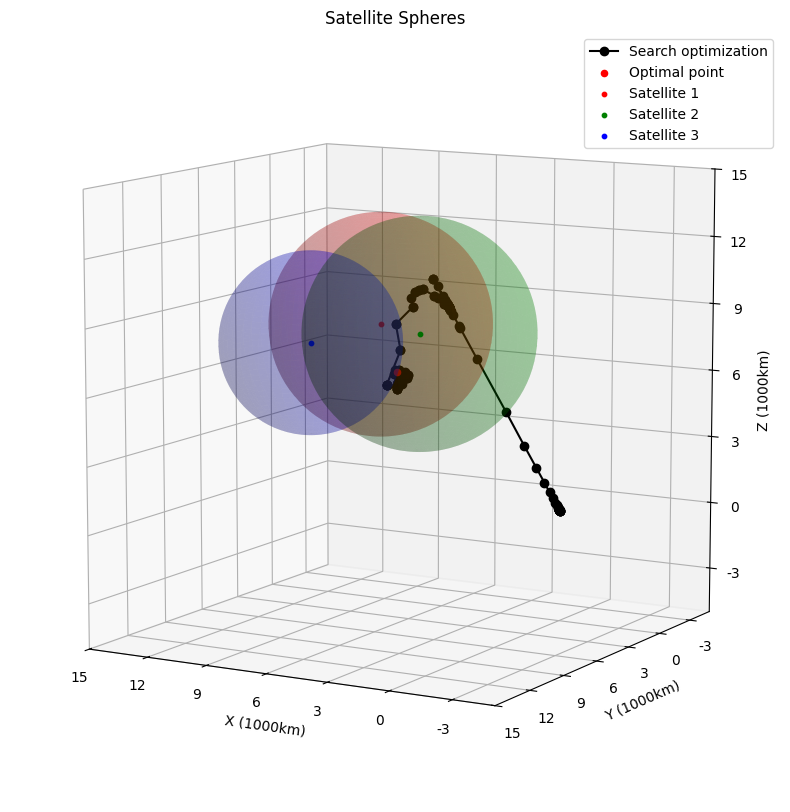

In [17]:
initial_guess = [0, 0, 0]

# Initialize search points list
search_points = []

# Solve optimization
result = scipy.optimize.minimize(G_numeric,
                                 initial_guess,
                                 method='Nelder-Mead',
                                 callback=callback)

optimal_point = result.x

# Convert list to array
search_points = np.array(search_points)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot search points and optimal point
ax.plot(search_points[:, 0], search_points[:, 1], search_points[:, 2], 'ko-', markersize=6, label='Search optimization')
ax.scatter(optimal_point[0], optimal_point[1], optimal_point[2], color='r', s=20, label='Optimal point')

plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=120)
print("Optimal point found: ", optimal_point)

Optimal point found:  [4.98265749 5.74995079 6.64601899]


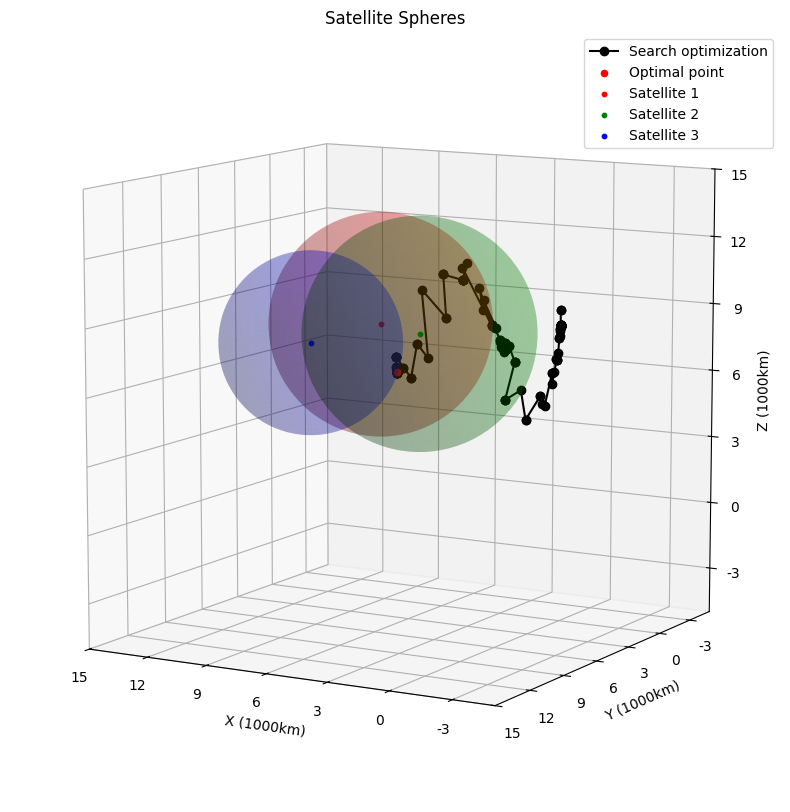

In [18]:
initial_guess = [0, 0, 10]

# Initialize search points list
search_points = []

# Solve optimization
result = scipy.optimize.minimize(G_numeric,
                                 initial_guess,
                                 method='Nelder-Mead',
                                 callback=callback)

optimal_point = result.x

# Convert list to array
search_points = np.array(search_points)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot search points and optimal point
ax.plot(search_points[:, 0], search_points[:, 1], search_points[:, 2], 'ko-', markersize=6, label='Search optimization')
ax.scatter(optimal_point[0], optimal_point[1], optimal_point[2], color='r', s=20, label='Optimal point')

plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=120)
print("Optimal point found: ", optimal_point)

Optimal point found:  [ 5.58492934  5.74999014 10.25939015]


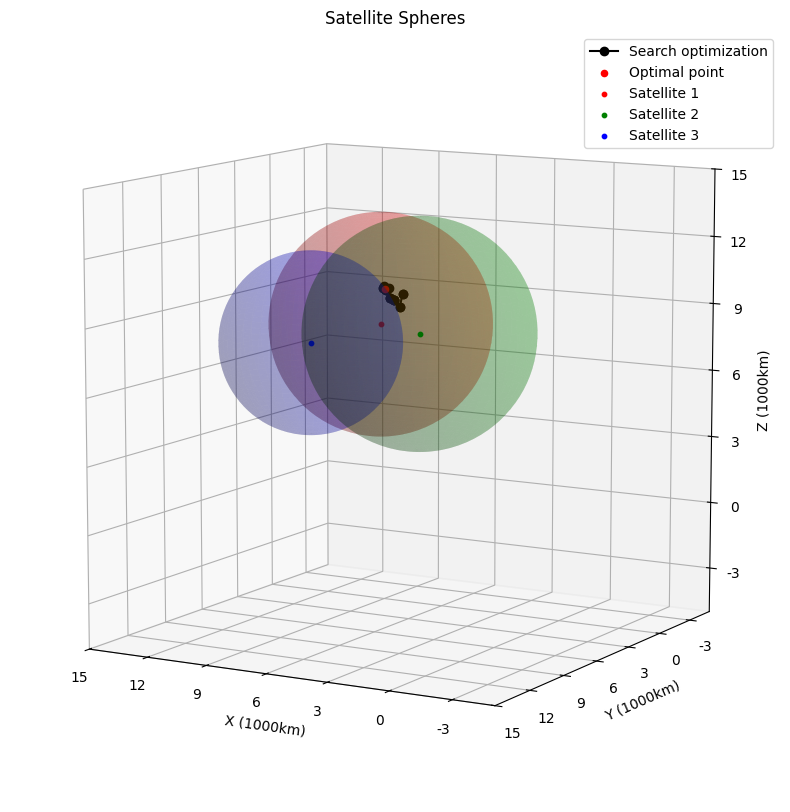

In [19]:
initial_guess = [5, 5, 10]

# Initialize search points list
search_points = []

# Solve optimization
result = scipy.optimize.minimize(G_numeric,
                                 initial_guess,
                                 method='Nelder-Mead',
                                 callback=callback)

optimal_point = result.x

# Convert list to array
search_points = np.array(search_points)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot search points and optimal point
ax.plot(search_points[:, 0], search_points[:, 1], search_points[:, 2], 'ko-', markersize=6, label='Search optimization')
ax.scatter(optimal_point[0], optimal_point[1], optimal_point[2], color='r', s=20, label='Optimal point')

plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=120)
print("Optimal point found: ", optimal_point)

Usando um método que faz uso da jacobiana numérica é possível observar que a solução é encontrada com menos passos. Além disso, a segunda solução é facilmente encontrada alterando somente o ponto inicial de Z.

Optimal point found:  [4.9826719  5.75000003 6.64603119]


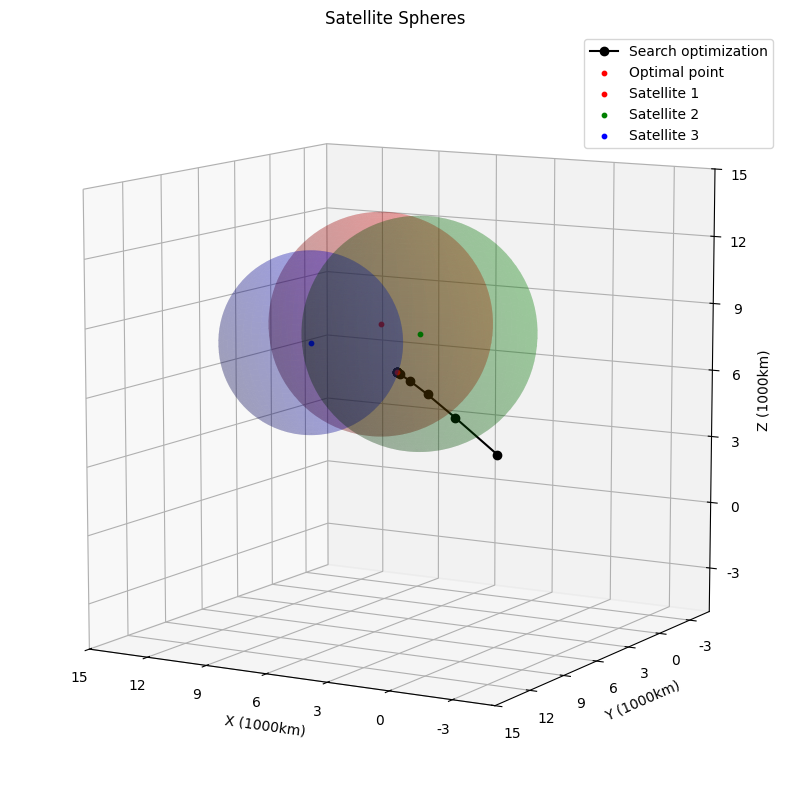

In [20]:
initial_guess = [0, 0, 0]

# Initialize search points list
search_points = []

# Solve optimization
result = scipy.optimize.minimize(G_numeric,
                                 initial_guess,
                                 method='Newton-CG',
                                 jac=J_numeric,
                                 callback=callback)
optimal_point = result.x

# Convert list to array
search_points = np.array(search_points)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot search points and optimal point
ax.plot(search_points[:, 0], search_points[:, 1], search_points[:, 2], 'ko-', markersize=6, label='Search optimization')
ax.scatter(optimal_point[0], optimal_point[1], optimal_point[2], color='r', s=10, label='Optimal point')

plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=120)
print("Optimal point found: ", optimal_point)


Optimal point found:  [ 5.58489592  5.75000013 10.25937456]


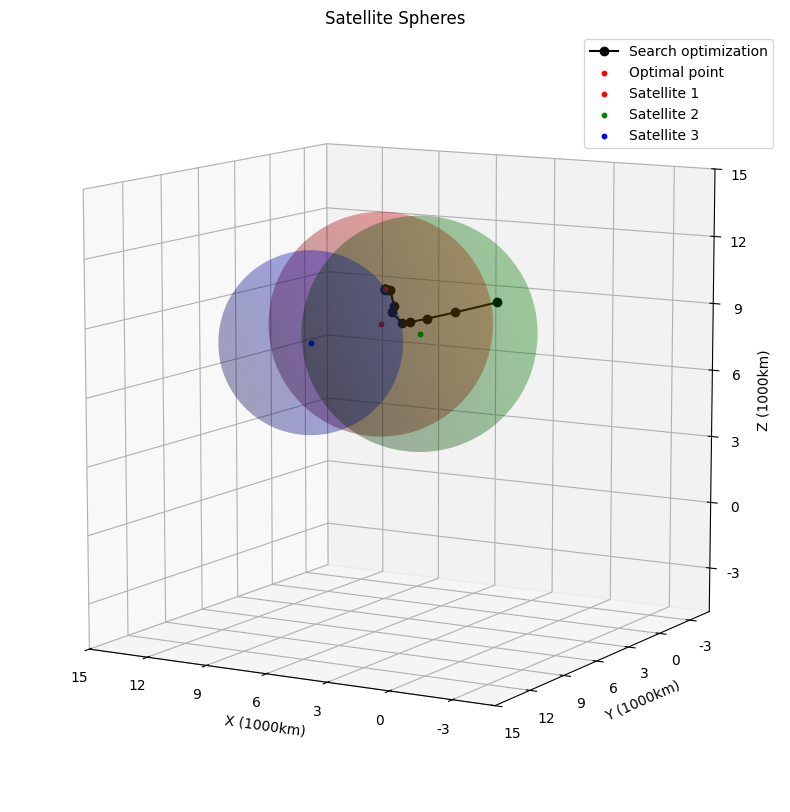

In [21]:
initial_guess = [0, 0, 10]

# Initialize search points list
search_points = []

# Solve optimization
result = scipy.optimize.minimize(G_numeric,
                                 initial_guess,
                                 method='Newton-CG',
                                 jac=J_numeric,
                                 callback=callback)
optimal_point = result.x

# Convert list to array
search_points = np.array(search_points)

# Create figure
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot search points and optimal point
ax.plot(search_points[:, 0], search_points[:, 1], search_points[:, 2], 'ko-', markersize=6, label='Search optimization')
ax.scatter(optimal_point[0], optimal_point[1], optimal_point[2], color='r', s=10, label='Optimal point')

plot_satellites_and_spheres(ax, r1, r2, r3, R1, R2, R3, elev=10, azim=120)
print("Optimal point found: ", optimal_point)
